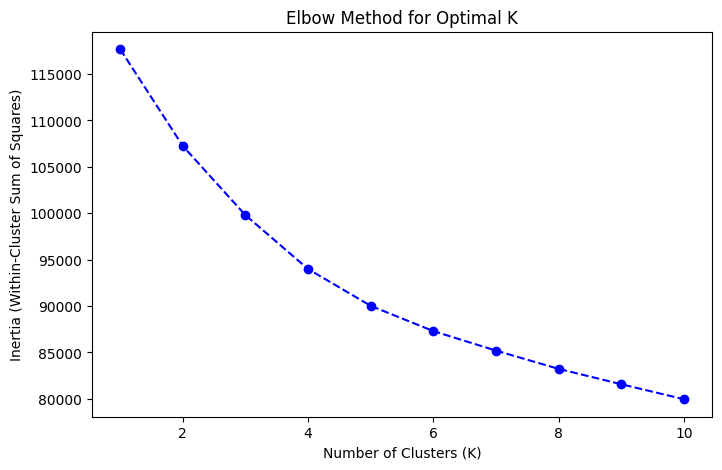

===== Final Clustering Metrics =====
Silhouette Score: 0.1087 (Higher is better)
Davies-Bouldin Index: 2.5912 (Lower is better)
Calinski-Harabasz Index: 898.8993 (Higher is better)


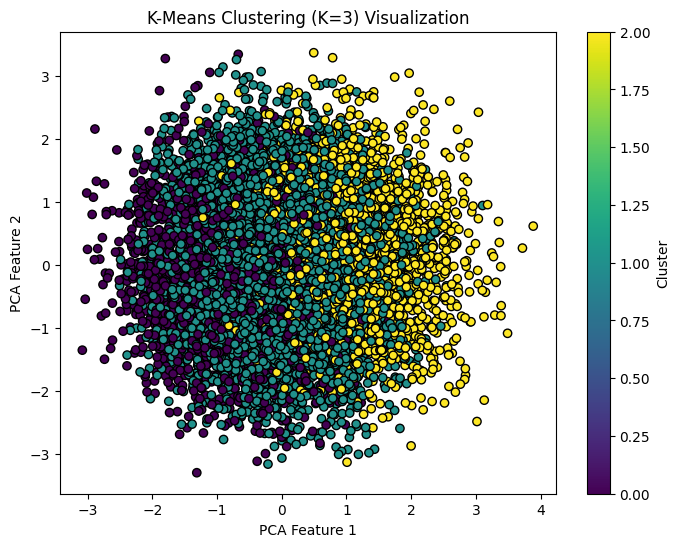

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.utils import resample

# Load dataset
file_path = r"C:\Users\Sanjay\Desktop\ML Tutorial\archive\laptop_prices.csv"
df = pd.read_csv(file_path)

# Convert Storage to numerical format (handling missing values)
df['Storage'] = df['Storage'].str.extract(r'(\d+)').dropna().astype(float)

# Convert Resolution to total pixel count
df[['Width', 'Height']] = df['Resolution'].str.split('x', expand=True).astype(float)
df['Total_Pixels'] = df['Width'] * df['Height']
df.drop(columns=['Resolution', 'Width', 'Height'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Brand', 'Processor', 'GPU', 'Operating System']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features for clustering (excluding price)
X = df.drop(columns=['Price ($)'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal K using Elbow Method
inertia = []
K_range = range(1, 11)  # Checking K values from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Train K-Means model with optimal K (choose K based on elbow graph, e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Take a random sample to avoid MemoryError
sample_size = min(10000, len(X_scaled))  # Ensure it doesn't exceed dataset size
X_sample, labels_sample = resample(X_scaled, df['Cluster'], n_samples=sample_size, random_state=42)

# Evaluate Clustering Performance
silhouette_avg = silhouette_score(X_sample, labels_sample)
davies_bouldin = davies_bouldin_score(X_sample, labels_sample)
calinski_harabasz = calinski_harabasz_score(X_sample, labels_sample)

# Print evaluation metrics
print("===== Final Clustering Metrics =====")
print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better)")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolors='k')
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title(f"K-Means Clustering (K={optimal_k}) Visualization")
plt.colorbar(label="Cluster")
plt.show()
